# Unsupervised Learning in R

> clustering and dimensionality reduction in R from a machine learning perspective

- author: Victor Omondi
- toc: true
- comments: true
- categories: [unsupervised-learning, machine-learning, r]
- image: images/ield.png

# Overview

Many times in machine learning, the goal is to find patterns in data without trying to make predictions. This is called unsupervised learning. One common use case of unsupervised learning is grouping consumers based on demographics and purchasing history to deploy targeted marketing campaigns. Another example is wanting to describe the unmeasured factors that most influence crime differences between cities. We will cover basic introduction to clustering and dimensionality reduction in R from a machine learning perspective, so that we can get from data to insights as quickly as possible.


# Libraries

In [1]:
library(readr)
library(ggplot2)
library(dplyr)

Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



# Unsupervised learning in R

The k-means algorithm is one common approach to clustering. We will explore how the algorithm works under the hood, implement k-means clustering in R, visualize and interpret the results, and select the number of clusters when it's not known ahead of time. We'll have applied k-means clustering to a fun "real-world" dataset!

### Types of machine learning
- Unsupervised learning
  - Finding structure in unlabeled data
- Supervised learning
  - Making predictions based on labeled data
  - Predictions like regression or classication
- Reinforcement learning

### Unsupervised learning - clustering
- Finding homogeneous subgroups within larger group 
- _People have features such as income, education attainment, and gender_


### Unsupervised learning - dimensionality reduction
- Finding homogeneous subgroups within larger group
  - Clustering
- Finding patterns in the features of the data
  - Dimensionality reduction
    - Find patterns in the features of the data
    - Visualization of high dimensional data
    - Pre-processing before supervised learning


### Challenges and benefits
- No single goal of analysis
- Requires more creativity
- Much more unlabeled data available than cleanly labeled data


## Introduction to k-means clustering

### k-means clustering algorithm
- Breaks observations into pre-dened number of clusters

### k-means in R

- One observation per row, one feature per column
- k-means has a random component
- Run algorithm multiple times to improve odds of the best model


In [2]:
x <- as.matrix(x_df <- read_csv("datasets/x.csv"))
class(x)

Parsed with column specification:
cols(
  V1 = col_double(),
  V2 = col_double()
)


[1] "matrix"

In [3]:
head(x)

V1,V2
3.370958,1.995379
1.435302,2.760242
2.363128,2.038991
2.632863,2.735072
2.404268,1.853527
1.893875,1.942113


### k-means clustering

We have created some two-dimensional data and stored it in a variable called `x`.

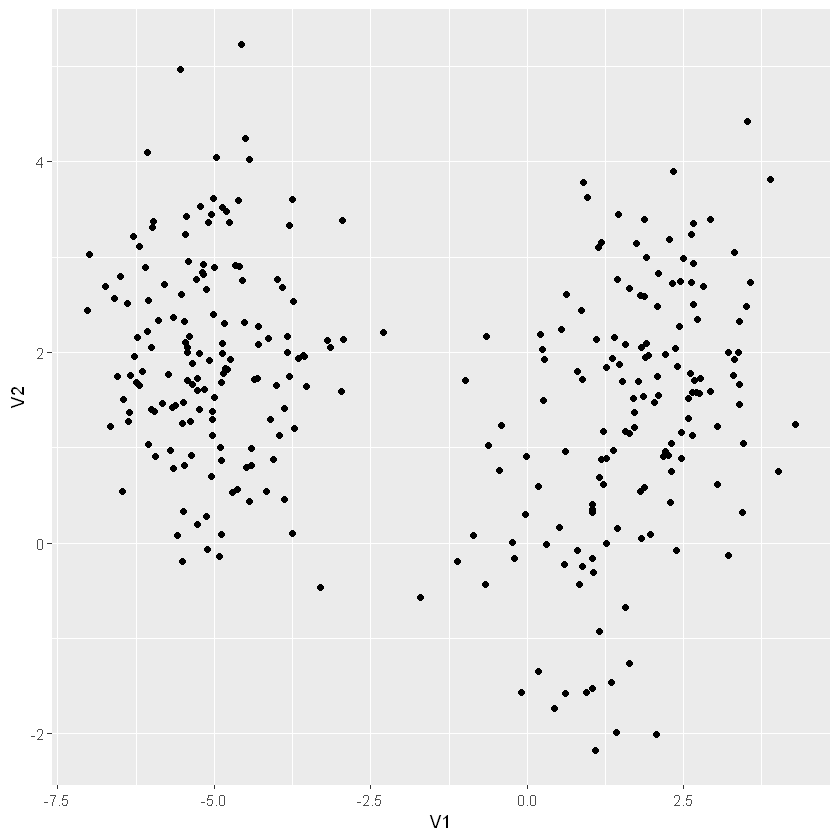

In [4]:
x_df %>%
    ggplot(aes(x=V1, y=V2)) +
    geom_point()

The scatter plot on the above is a visual representation of the data.

We will create a k-means model of the `x` data using 3 clusters, then to look at the structure of the resulting model using the `summary()` function.

In [5]:
# Create the k-means model: km.out
km.out_x <- kmeans(x, centers=3, nstart=20)

# Inspect the result
summary(km.out_x)

             Length Class  Mode   
cluster      300    -none- numeric
centers        6    -none- numeric
totss          1    -none- numeric
withinss       3    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           3    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric

### Results of kmeans()

The `kmeans()` function produces several outputs. One is the output of modeling, the cluster membership. We will access the `cluster` component directly. This is useful anytime we need the cluster membership for each observation of the data used to build the clustering model. This cluster membership might be used to help communicate the results of k-means modeling.

`k-means` models also have a print method to give a human friendly output of basic modeling results. This is available by using `print()` or simply typing the name of the model.

In [6]:
# Print the cluster membership component of the model
km.out_x$cluster



[1] 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 [38] 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[186] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[223] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 1 2 2 2 2
[260] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2
[297] 2 1 2 2

In [7]:
# Print the km.out object
km.out_x

K-means clustering with 3 clusters of sizes 98, 52, 150

Cluster means:
          V1          V2
1  2.2171113  2.05110690
2  0.6642455 -0.09132968
3 -5.0556758  1.96991743

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 [38] 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[186] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[223] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 1 2 2 2 2
[260] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2
[297] 2 1 2 2

Within cluster sum of squares by cluster:
[1] 148.64781  95.50625 295.16925
 (between_SS / total_SS =  87.2 %)

Available components:

[1] "cluster"     

### Visualizing and interpreting results of kmeans()

One of the more intuitive ways to interpret the results of k-means models is by plotting the data as a scatter plot and using color to label the samples' cluster membership. We will use the standard `plot()` function to accomplish this.

To create a scatter plot, we can pass data with two features (i.e. columns) to `plot()` with an extra argument `col = km.out$cluster`, which sets the color of each point in the scatter plot according to its cluster membership.

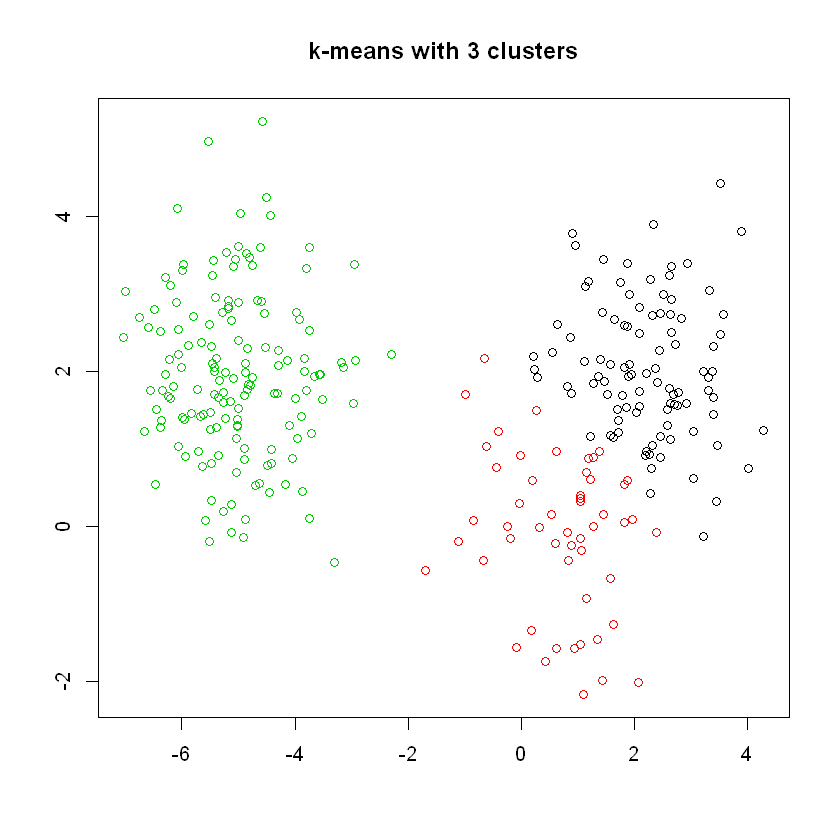

In [8]:
# Scatter plot of x
plot(x, main="k-means with 3 clusters", col=km.out_x$cluster, xlab="", ylab="")

## How k-means works and practical matters

### Objectives
- Explain how k-means algorithm is implemented visually
- **Model selection**: determining number of clusters

### Model selection
- Recall k-means has a random component
- Best outcome is based on total within cluster sum of squares:
  - For each cluster
    - For each observation in the cluster
      - Determine squared distance from observation to cluster center
    - Sum all of them together
- Running algorithm multiple times helps find the global minimum total within cluster sum of squares

### Handling random algorithms

`kmeans()` randomly initializes the centers of clusters. This random initialization can result in assigning observations to different cluster labels. Also, the random initialization can result in finding different local minima for the k-means algorithm. we will demonstrate both results.

At the top of each plot, the measure of model quality—total within cluster sum of squares error—will be plotted. Look for the model(s) with the lowest error to find models with the better model results.

Because `kmeans()` initializes observations to random clusters, it is important to set the random number generator seed for reproducibility.

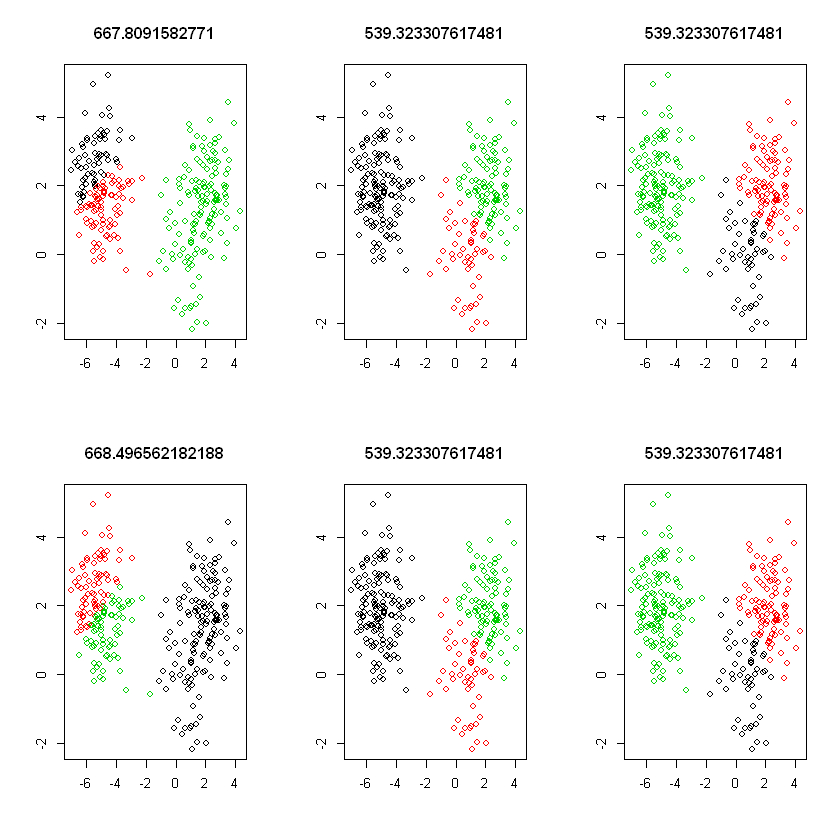

In [9]:
# Set up 2 x 3 plotting grid
par(mfrow = c(2, 3))

# Set seed
set.seed(1)

for(i in 1:6) {
  # Run kmeans() on x with three clusters and one start
  km.out <- kmeans(x, centers=3, nstart=1)
  
  # Plot clusters
  plot(x, col = km.out$cluster, 
       main = km.out$tot.withinss, 
       xlab = "", ylab = "")
}

Because of the random initialization of the k-means algorithm, there's quite some variation in cluster assignments among the six models.

### Selecting number of clusters

The k-means algorithm assumes the number of clusters as part of the input. If you know the number of clusters in advance (e.g. due to certain business constraints) this makes setting the number of clusters easy. However, if you do not know the number of clusters and need to determine it, you will need to run the algorithm multiple times, each time with a different number of clusters. From this, we can observe how a measure of model quality changes with the number of clusters.

We will run `kmeans()` multiple times to see how model quality changes as the number of clusters changes. Plots displaying this information help to determine the number of clusters and are often referred to as scree plots.

The ideal plot will have an elbow where the quality measure improves more slowly as the number of clusters increases. This indicates that the quality of the model is no longer improving substantially as the model complexity (i.e. number of clusters) increases. In other words, the elbow indicates the number of clusters inherent in the data.

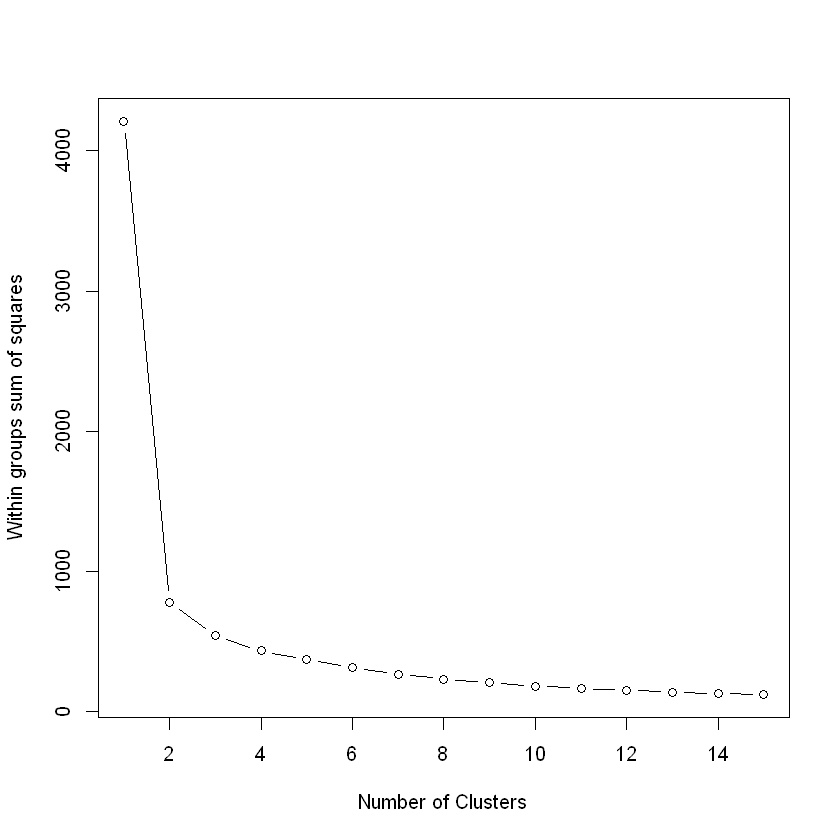

In [10]:
# Initialize total within sum of squares error: wss
wss <- 0

# For 1 to 15 cluster centers
for (i in 1:15) {
  km.out <- kmeans(x, centers = i, nstart=20)
  # Save total within sum of squares to wss variable
  wss[i] <- km.out$tot.withinss
}

# Plot total within sum of squares vs. number of clusters
plot(1:15, wss, type = "b", 
     xlab = "Number of Clusters", 
     ylab = "Within groups sum of squares")



In [11]:
# Set k equal to the number of clusters corresponding to the elbow location
k <- 2

Looking at the scree plot, it looks like there are inherently 2 or 3 clusters in the data.

## Introduction to the Pokemon data


In [12]:
pokemon <- read_csv("datasets//Pokemon.csv")
head(pokemon)

Parsed with column specification:
cols(
  Number = col_double(),
  Name = col_character(),
  Type1 = col_character(),
  Type2 = col_character(),
  Total = col_double(),
  HitPoints = col_double(),
  Attack = col_double(),
  Defense = col_double(),
  SpecialAttack = col_double(),
  SpecialDefense = col_double(),
  Speed = col_double(),
  Generation = col_double(),
  Legendary = col_logical()
)


Number,Name,Type1,Type2,Total,HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,FALSE
4,Charmander,Fire,NA,309,39,52,43,60,50,65,1,FALSE
5,Charmeleon,Fire,NA,405,58,64,58,80,65,80,1,FALSE


### Data challenges
- Selecting the variables to cluster upon
- Scaling the data
- Determining the number of clusters
  - Often no clean "elbow" in scree plot
  - This will be a core part. 
- Visualize the results for interpretation


### Practical matters: working with real data

Dealing with real data is often more challenging than dealing with synthetic data. Synthetic data helps with learning new concepts and techniques, but we will deal with data that is closer to the type of real data we might find in the professional or academic pursuits.

The first challenge with the Pokemon data is that there is no pre-determined number of clusters. We will determine the appropriate number of clusters, keeping in mind that in real data the elbow in the scree plot might be less of a sharp elbow than in synthetic data. We'll use our judgement on making the determination of the number of clusters.

We'll be plotting the outcomes of the clustering on two dimensions, or features, of the data.

An additional note: We'll utilize the `iter.max` argument to `kmeans()`. `kmeans()` is an iterative algorithm, repeating over and over until some stopping criterion is reached. The default number of iterations for `kmeans()` is 10, which is not enough for the algorithm to converge and reach its stopping criterion, so we'll set the number of iterations to 50 to overcome this issue. 

In [13]:
head(pokemon <- pokemon %>%
        select(HitPoints:Speed))

HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed
45,49,49,65,65,45
60,62,63,80,80,60
80,82,83,100,100,80
80,100,123,122,120,80
39,52,43,60,50,65
58,64,58,80,65,80


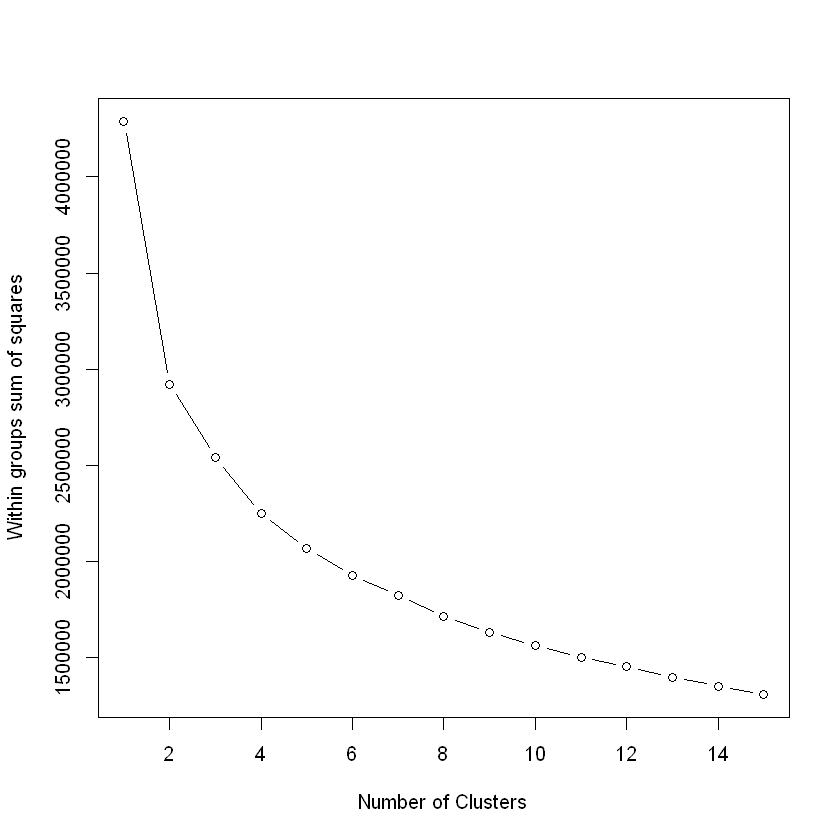

In [14]:
# Initialize total within sum of squares error: wss
wss <- 0

# Look over 1 to 15 possible clusters
for (i in 1:15) {
  # Fit the model: km.out
  km.out <- kmeans(pokemon, centers = i, nstart = 20, iter.max = 50)
  # Save the within cluster sum of squares
  wss[i] <- km.out$tot.withinss
}

# Produce a scree plot
plot(1:15, wss, type = "b", 
     xlab = "Number of Clusters", 
     ylab = "Within groups sum of squares")



In [15]:
# Select number of clusters
k <- 2

# Build model with k clusters: km.out
km.out <- kmeans(pokemon, centers = 2, nstart = 20, iter.max = 50)

# View the resulting model
km.out



K-means clustering with 2 clusters of sizes 374, 426

Cluster means:
  HitPoints   Attack  Defense SpecialAttack SpecialDefense    Speed
1  54.87968 57.94118 55.49733      52.33155       53.44118 54.04278
2  81.88263 97.49061 89.94836      90.80751       88.11033 80.77465

Clustering vector:
  [1] 1 1 2 2 1 1 2 2 2 1 1 2 2 1 1 1 1 1 1 2 1 1 2 2 1 1 1 2 1 2 1 2 1 2 1 1 2
 [38] 1 1 2 1 2 1 2 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 2 1 2 1 2 1 1 2 1 1 2 2 1 1
 [75] 2 1 1 2 1 2 1 1 2 1 2 1 2 2 1 2 1 1 2 1 2 1 2 1 2 1 1 2 2 1 1 2 1 2 1 2 1
[112] 2 1 2 2 2 1 1 2 1 2 1 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2
[149] 1 1 2 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1 1 1 2 1
[186] 2 1 1 1 1 1 1 2 1 1 2 2 2 1 1 1 2 1 1 2 1 1 2 1 1 2 2 2 1 2 2 1 1 2 1 2 1
[223] 1 2 2 1 2 1 2 2 2 2 2 1 1 2 1 1 1 2 1 1 2 1 2 2 1 2 2 2 1 2 2 2 1 1 2 1 1
[260] 1 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2 2 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2
[297] 1 1 2 1 1 1 2 1 1 2 2 1 1 1 2 1 2 2 1 2 1 1 1 2 1 2 1 1 1 1 1

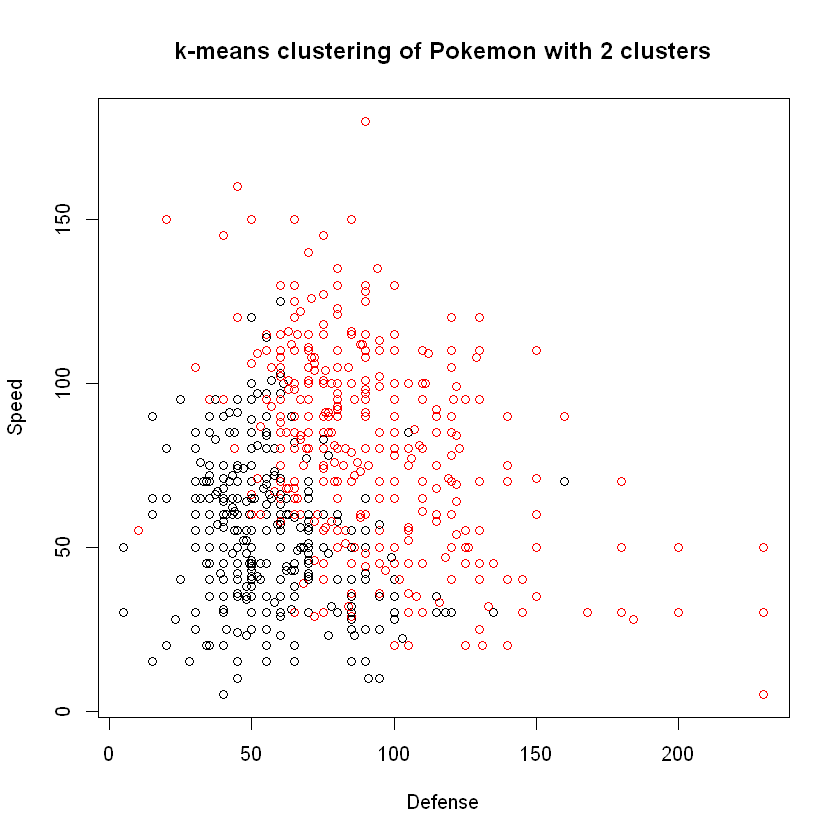

In [16]:
# Plot of Defense vs. Speed by cluster membership
plot(pokemon[, c("Defense", "Speed")],
     col = km.out$cluster,
     main = paste("k-means clustering of Pokemon with", k, "clusters"),
     xlab = "Defense", ylab = "Speed")

## Review of k-means clustering

### Chapter review
- Unsupervised vs. supervised learning
- How to create k-means cluster model in R
- How k-means algorithm works
- Model selection
- Application to "real" (and hopefully fun) dataset


# Hierarchical clustering

Hierarchical clustering is another popular method for clustering. We will go over how it works, how to use it, and how it compares to k-means clustering.



## Introduction to hierarchical clustering

### Hierarchical clustering
- Number of clusters is not known ahead of time
- Two kinds: bottom-up and top-down, we will focus on bottom-up

### Hierarchical clustering in R

In [17]:
dist_matrix <- dist(x)
hclust(dist_matrix)


Call:
hclust(d = dist_matrix)

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 300 


In [18]:
head(x <- as.matrix(x_df <- read_csv("datasets//x2.csv")))

Parsed with column specification:
cols(
  V1 = col_double(),
  V2 = col_double()
)


V1,V2
3.370958,2.321925
1.435302,1.216161
2.363128,3.575728
2.632863,2.642899
2.404268,2.089761
1.893875,2.276551


In [19]:
class(x)

[1] "matrix"

### Hierarchical clustering with results

We will create hierarchical clustering model using the `hclust()` function.

In [20]:
# Create hierarchical clustering model: hclust.out
hclust.out <- hclust(dist(x))

# Inspect the result
summary(hclust.out)

            Length Class  Mode     
merge       98     -none- numeric  
height      49     -none- numeric  
order       50     -none- numeric  
labels       0     -none- NULL     
method       1     -none- character
call         2     -none- call     
dist.method  1     -none- character

## Selecting number of clusters

### Dendrogram
- Tree shaped structure used to interpret hierarchical clustering models

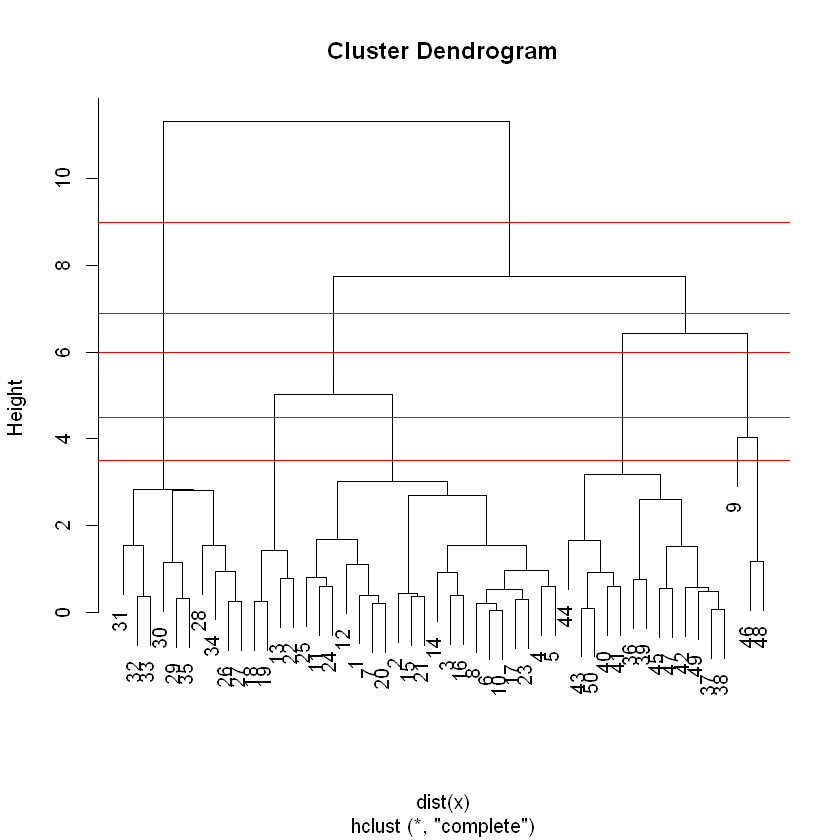

In [21]:
plot(hclust.out)
abline(h=6, col="red")
abline(h=3.5, col="red")
abline(h=4.5, col="red")
abline(h=6.9, col="red")
abline(h=9, col="red")

If you cut the tree at a height of 6.9, you're left with 3 branches representing 3 distinct clusters.

### Tree "cutting" in R

`cutree()` is the R function that cuts a hierarchical model. The `h` and `k` arguments to `cutree()` allow you to cut the tree based on a certain height `h` or a certain number of clusters `k`.

In [22]:
cutree(hclust.out, h=6)

[1] 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 4 4 4
[39] 4 4 4 4 4 4 4 2 4 2 4 4

In [23]:
cutree(hclust.out, k=2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

In [24]:
# Cut by height
cutree(hclust.out, h=7)



[1] 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

In [25]:
# Cut by number of clusters
cutree(hclust.out, k=3)

[1] 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

The output of each `cutree()` call represents the cluster assignments for each observation in the original dataset

## Clustering linkage and practical matters

### Linking clusters in hierarchical clustering
- How is distance between clusters determined? Rules?
- Four methods to determine which cluster should be linked
  - **Complete**: pairwise similarity between all observations in cluster 1 and cluster 2, and uses ***largest of similarities***
  - **Single**: same as above but uses ***smallest of similarities***
  - **Average**: same as above but uses ***average of similarities***
  - **Centroid**: finds centroid of cluster 1 and centroid of cluster 2, and uses ***similarity between two centroids***


### Linkage in R

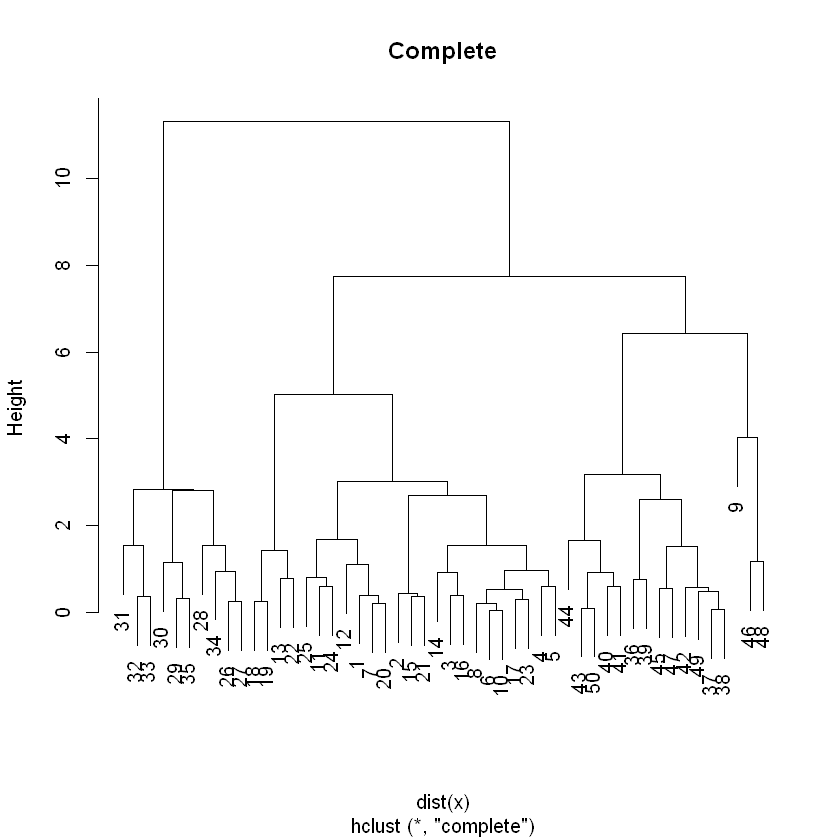

In [35]:
hclust.complete <- hclust(dist(x), method = "complete")
hclust.average <- hclust(dist(x), method = "average")
hclust.single <- hclust(dist(x), method = "single")

plot(hclust.complete, main="Complete")

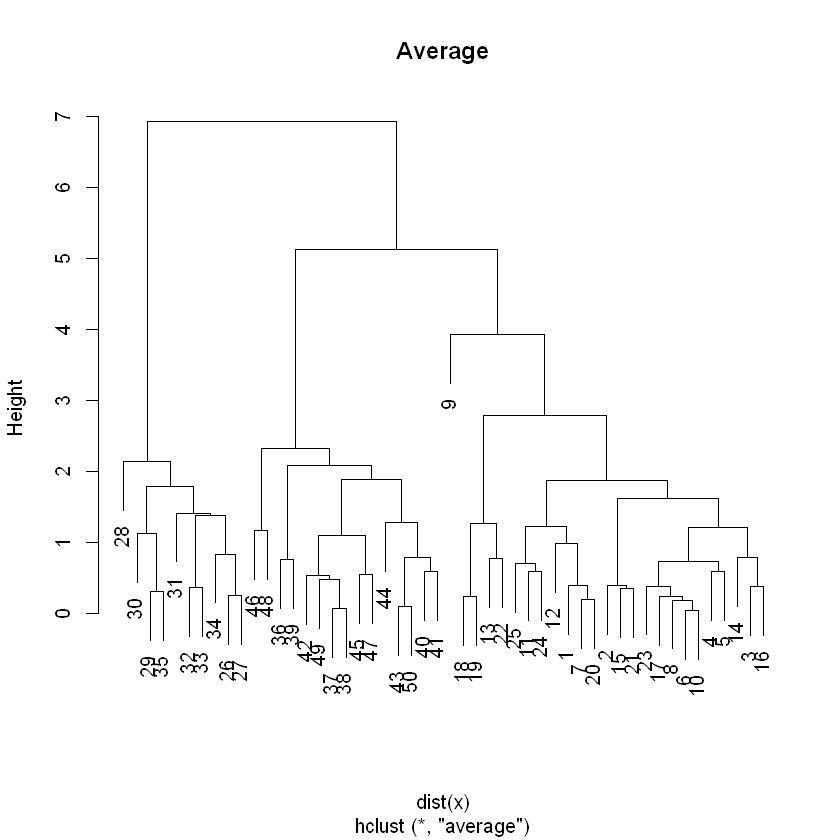

In [34]:
plot(hclust.average, main="Average")

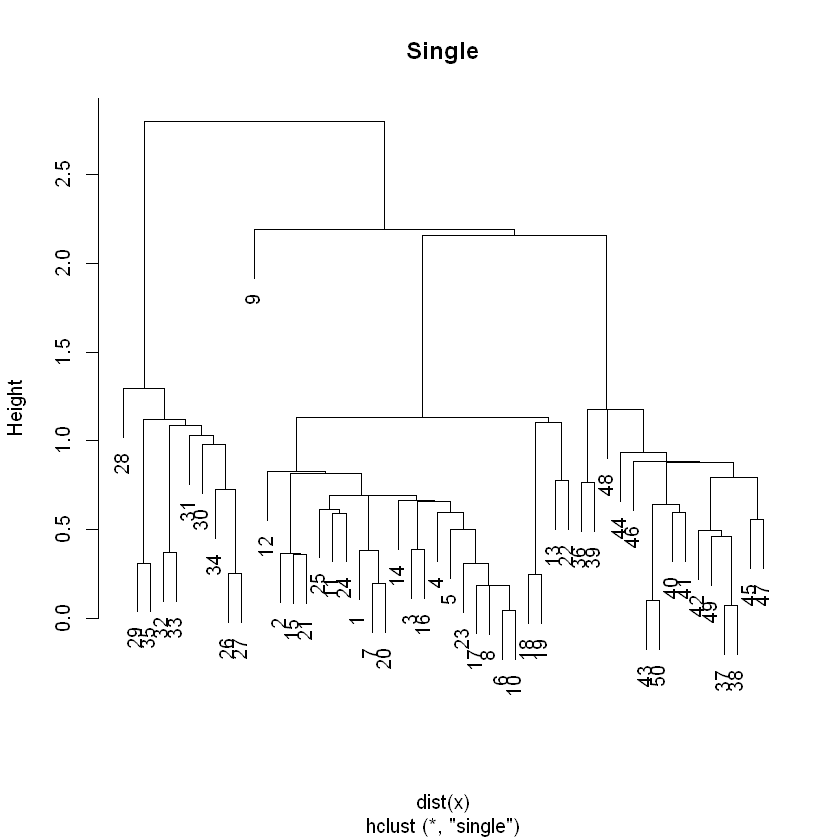

In [33]:
plot(hclust.single, main="Single")

Whether you want balanced or unbalanced trees for hierarchical clustering model depends on the context of the problem you're trying to solve. Balanced trees are essential if you want an even number of observations assigned to each cluster. On the other hand, if you want to detect outliers, for example, an unbalanced tree is more desirable because pruning an unbalanced tree can result in most observations assigned to one cluster and only a few observations assigned to other clusters.

### Practical matters
- Data on different scales can cause undesirable results in clustering methods
- Solution is to scale data so that features have same mean and standard deviation
  - Subtract mean of a feature from all observations
  - Divide each feature by the standard deviation of the feature
  - Normalized features have a mean of zero and a standard deviation of one


In [29]:
colMeans(x)

V1          V2 
-0.03567178  0.90070141

In [30]:
apply(x, 2, sd)

V1       V2 
2.993586 2.086135

In [31]:
scaled_x <- scale(x)
colMeans(scaled_x)

V1            V2 
-2.289835e-18 -8.673617e-18

In [32]:
apply(scaled_x, 2, sd)

V1 V2 
 1  1

### Linkage methods

We will produce hierarchical clustering models using different linkages and plot the dendrogram for each, observing the overall structure of the trees.

### Practical matters: scaling

Clustering real data may require scaling the features if they have different distributions. We will go back to working with "real" data, the `pokemon` dataset. We will observe the distribution (mean and standard deviation) of each feature, scale the data accordingly, then produce a hierarchical clustering model using the complete linkage method.



In [36]:
# View column means
colMeans(pokemon)



HitPoints         Attack        Defense  SpecialAttack SpecialDefense 
      69.25875       79.00125       73.84250       72.82000       71.90250 
         Speed 
      68.27750

In [37]:
# View column standard deviations
apply(pokemon, 2, sd)



HitPoints         Attack        Defense  SpecialAttack SpecialDefense 
      25.53467       32.45737       31.18350       32.72229       27.82892 
         Speed 
      29.06047

In [38]:
# Scale the data
pokemon.scaled = scale(pokemon)

# Create hierarchical clustering model: hclust.pokemon
hclust.pokemon <- hclust(dist(pokemon.scaled), method="complete")

### Comparing kmeans() and hclust()

Comparing k-means and hierarchical clustering, we'll see the two methods produce different cluster memberships. This is because the two algorithms make different assumptions about how the data is generated. In a more advanced course, we could choose to use one model over another based on the quality of the models' assumptions, but for now, it's enough to observe that they are different.

We will have compare results from the two models on the pokemon dataset to see how they differ.

In [40]:
# Apply cutree() to hclust.pokemon: cut.pokemon
cut.pokemon<- cutree(hclust.pokemon, k=3)

# Compare methods
table(km.out$cluster, cut.pokemon)

   cut.pokemon
      1   2   3
  1 369   5   0
  2 419   6   1

# Dimensionality reduction with PCA

Principal component analysis, or PCA, is a common approach to dimensionality reduction. We'll explore exactly what PCA does, visualize the results of PCA with biplots and scree plots, and deal with practical issues such as centering and scaling the data before performing PCA.

## Introduction to PCA

### Two methods of clustering
- Two methods of clustering - finding groups of homogeneous items
- Next up, dimensionality reduction
  - Find structure in features
  - Aid in visualization


### Dimensionality reduction
- A popular method is principal component analysis (PCA)
- Three goals when finding lower dimensional representation of features:
  - Find linear combination of variables to create principal components
  - Maintain most variance in the data
  - Principal components are uncorrelated (i.e. orthogonal to each other)


In [41]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


### PCA in R


In [43]:
summary(
    pr.iris <- prcomp(x=iris[-5], scale=F, center=T)
)

Importance of components:
                          PC1     PC2    PC3     PC4
Standard deviation     2.0563 0.49262 0.2797 0.15439
Proportion of Variance 0.9246 0.05307 0.0171 0.00521
Cumulative Proportion  0.9246 0.97769 0.9948 1.00000

### PCA using prcomp()
We will create  PCA model and observe the diagnostic results.

We have loaded the Pokemon data, which has four dimensions, and placed it in a variable called `pokemon`. We'll create a PCA model of the data, then to inspect the resulting model using the `summary()` function.

In [44]:
# Perform scaled PCA: pr.out
pr.out <- prcomp(pokemon, scale=T)

# Inspect model output
summary(pr.out)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6
Standard deviation     1.6466 1.0457 0.8825 0.8489 0.65463 0.51681
Proportion of Variance 0.4519 0.1822 0.1298 0.1201 0.07142 0.04451
Cumulative Proportion  0.4519 0.6342 0.7640 0.8841 0.95549 1.00000

The first 3 principal components describe around 77% of the variance.

### Additional results of PCA
PCA models in R produce additional diagnostic and output components:

- `center`: the column means used to center to the data, or `FALSE` if the data weren't centered
- `scale`: the column standard deviations used to scale the data, or `FALSE` if the data weren't scaled
- `rotation`: the directions of the principal component vectors in terms of the original features/variables. This information allows you to define new data in terms of the original principal components
- `x`: the value of each observation in the original dataset projected to the principal components
You can access these the same as other model components. For example, use `pr.out$rotation` to access the rotation component

In [46]:
head(pr.out$x)

PC1,PC2,PC3,PC4,PC5,PC6
-1.5554017,-0.02146869,0.6660872,0.18406113,0.403554706,-0.30281472
-0.3626397,-0.05023711,0.6674959,0.26908616,0.225647228,-0.19436515
1.2793512,-0.06268101,0.6235239,0.33118417,0.001544326,-0.06813435
2.6192779,0.70382271,0.9949151,-0.19919599,0.309976280,0.08732570
-1.7571845,-0.70573748,0.4111965,-0.26843393,0.168771440,-0.06932488
-0.4353607,-0.74735577,0.4059051,-0.04938257,0.061009227,0.13969565


In [48]:
pr.out$center

HitPoints         Attack        Defense  SpecialAttack SpecialDefense 
      69.25875       79.00125       73.84250       72.82000       71.90250 
         Speed 
      68.27750

In [49]:
pr.out$scale

HitPoints         Attack        Defense  SpecialAttack SpecialDefense 
      25.53467       32.45737       31.18350       32.72229       27.82892 
         Speed 
      29.06047

## Visualizing and interpreting PCA results

### Biplots in R

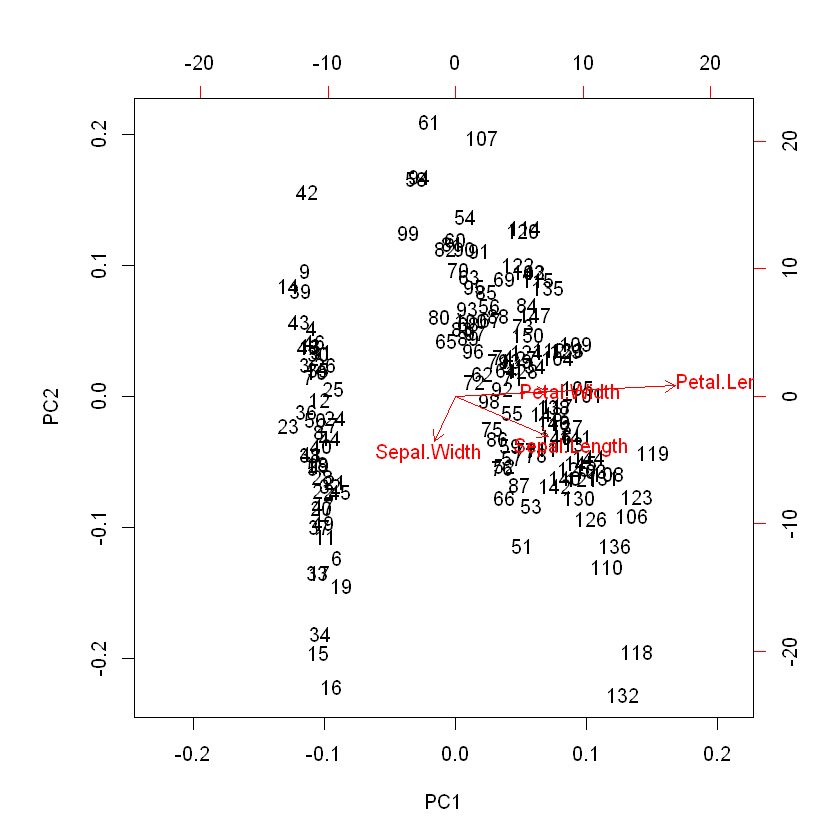

In [51]:
biplot(pr.iris)

Petal.Width and Petal.Length are correlated in the original dataset.

### Scree plots in R

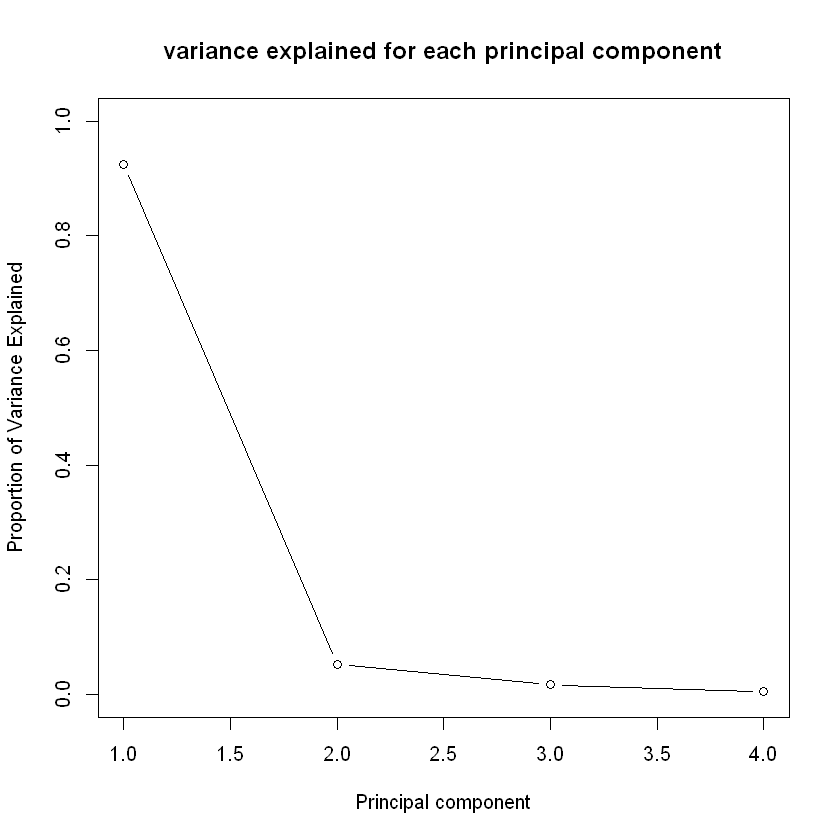

In [53]:
# Getting proportion of variance for a scree plot
pr.var <- pr.iris$sdev^2
pve <- pr.var/sum(pr.var)
# Plot variance explained for each principal component
plot(pve, main="variance explained for each principal component", 
     xlab="Principal component", ylab="Proportion of Variance Explained", ylim=c(0,1), type="b")

### Interpreting biplots (1)

The `biplot()` function plots both the principal components loadings and the mapping of the observations to their first two principal component values. We will do interpretation of the `biplot()` visualization.

Using the `biplot()` of the `pr.out` model, which two original variables have approximately the same loadings in the first two principal components?

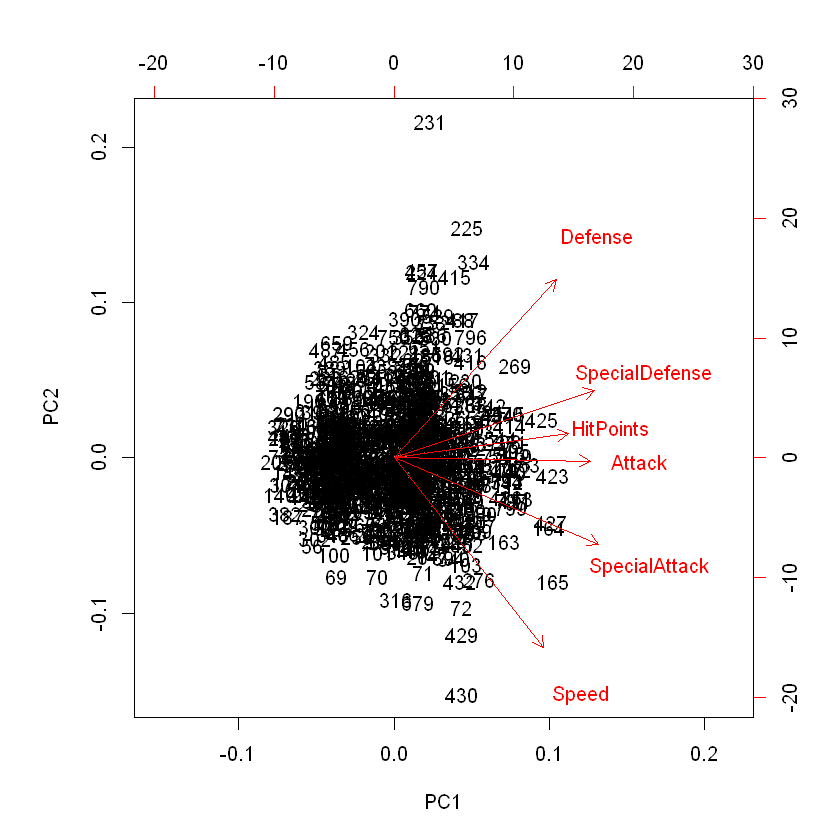

In [54]:
biplot(pr.out)

`Attack` and `HitPoints` have approximately the same loadings in the first two principal components

### Variance explained

The second common plot type for understanding PCA models is a scree plot. A scree plot shows the variance explained as the number of principal components increases. Sometimes the cumulative variance explained is plotted as well.

We will prepare data from the `pr.out` modelfor use in a scree plot. Preparing the data for plotting is required because there is not a built-in function in R to create this type of plot.

In [55]:
# Variability of each principal component: pr.var
pr.var <- pr.out$sdev^2

# Variance explained by each principal component: pve
pve <-pr.var / sum(pr.var)

### Visualize variance explained

Now we will create a scree plot showing the proportion of variance explained by each principal component, as well as the cumulative proportion of variance explained.

These plots can help to determine the number of principal components to retain. One way to determine the number of principal components to retain is by looking for an elbow in the scree plot showing that as the number of principal components increases, the rate at which variance is explained decreases substantially. In the absence of a clear elbow, we can use the scree plot as a guide for setting a threshold.

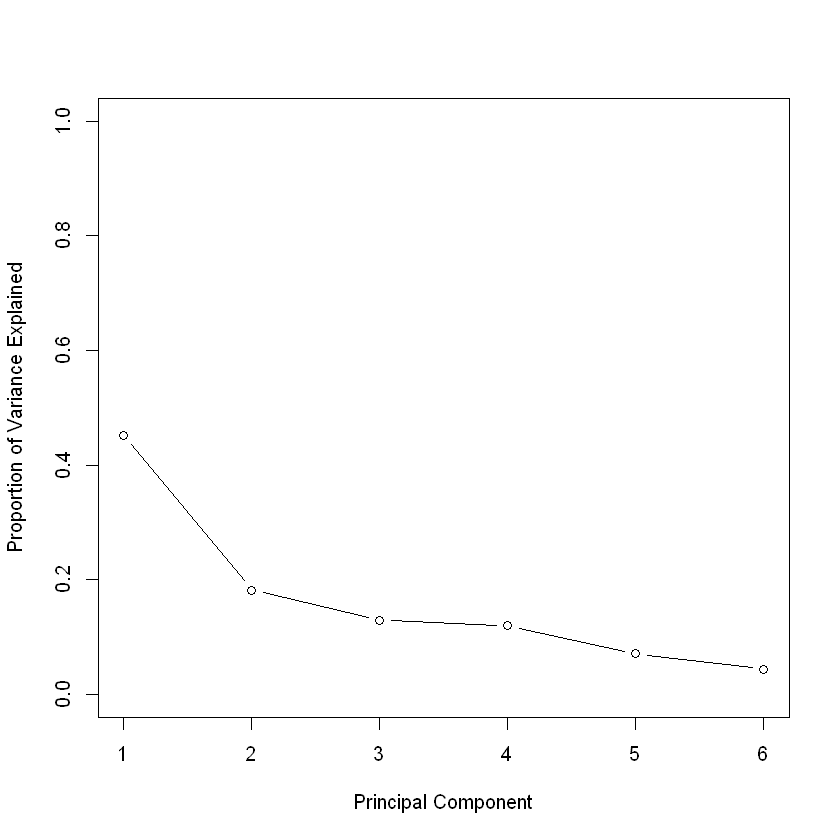

In [56]:
# Plot variance explained for each principal component
plot(pve, xlab = "Principal Component",
     ylab = "Proportion of Variance Explained",
     ylim = c(0, 1), type = "b")



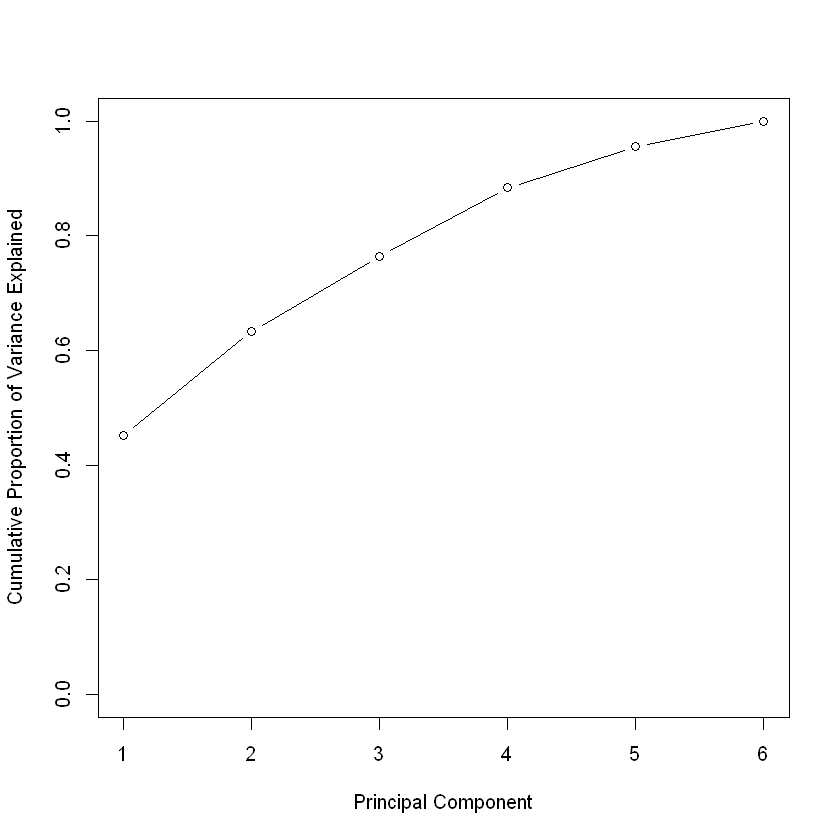

In [57]:
# Plot cumulative proportion of variance explained
plot(cumsum(pve), xlab = "Principal Component",
     ylab = "Cumulative Proportion of Variance Explained",
     ylim = c(0, 1), type = "b")

when the number of principal components is equal to the number of original features in the data, the cumulative proportion of variance explained is 1.

### Practical issues with PCA

- Scaling the data
- Missing values:
  - Drop observations with missing values
  - Impute / estimate missing values
- Categorical data:
  - Do not use categorical data features
  - Encode categorical features as numbers


### mtcars dataset

In [58]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


### Scaling

In [60]:
# Means and standard deviations vary a lot
round(colMeans(mtcars), 2)

mpg    cyl   disp     hp   drat     wt   qsec     vs     am   gear   carb 
 20.09   6.19 230.72 146.69   3.60   3.22  17.85   0.44   0.41   3.69   2.81

In [61]:
round(apply(mtcars, 2, sd), 2)

mpg    cyl   disp     hp   drat     wt   qsec     vs     am   gear   carb 
  6.03   1.79 123.94  68.56   0.53   0.98   1.79   0.50   0.50   0.74   1.62

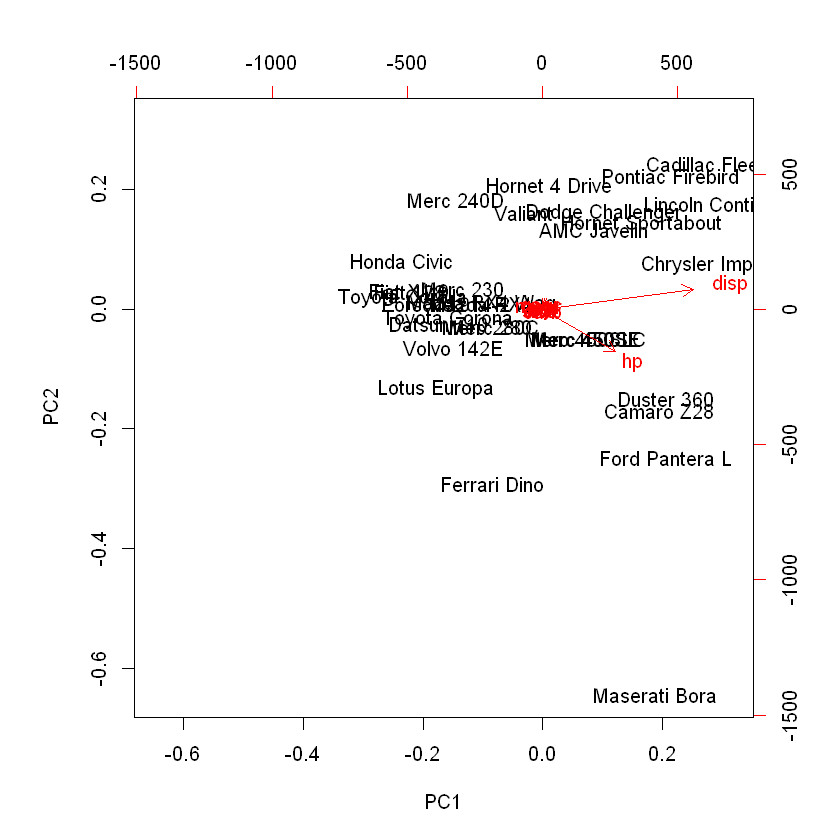

In [62]:
biplot(prcomp(mtcars, center=T, scale=F))

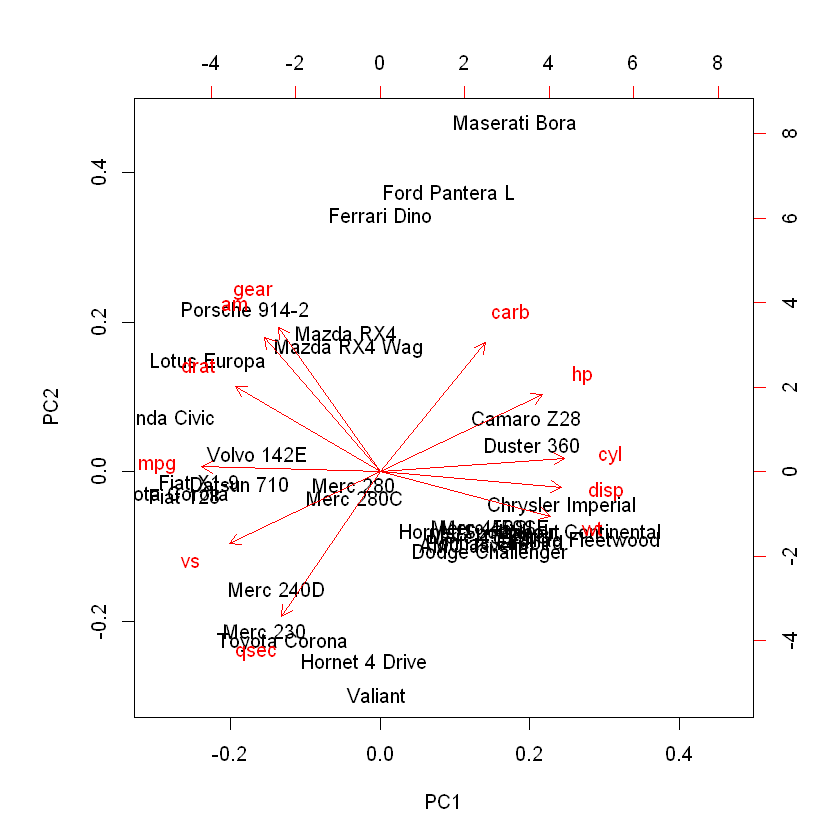

In [63]:
biplot(prcomp(mtcars, scale=T, center=T))

### Practical issues: scaling

Scaling data before doing PCA changes the results of the PCA modeling. Here, we will perform PCA with and without scaling, then visualize the results using biplots.

Sometimes scaling is appropriate when the variances of the variables are substantially different. This is commonly the case when variables have different units of measurement, for example, degrees Fahrenheit (temperature) and miles (distance). Making the decision to use scaling is an important step in performing a principal component analysis.

In [65]:
head(pokemon <- read_csv("datasets//Pokemon.csv"))

Parsed with column specification:
cols(
  Number = col_double(),
  Name = col_character(),
  Type1 = col_character(),
  Type2 = col_character(),
  Total = col_double(),
  HitPoints = col_double(),
  Attack = col_double(),
  Defense = col_double(),
  SpecialAttack = col_double(),
  SpecialDefense = col_double(),
  Speed = col_double(),
  Generation = col_double(),
  Legendary = col_logical()
)


Number,Name,Type1,Type2,Total,HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,FALSE
4,Charmander,Fire,NA,309,39,52,43,60,50,65,1,FALSE
5,Charmeleon,Fire,NA,405,58,64,58,80,65,80,1,FALSE


In [66]:
head(pokemon <- pokemon%>%
    select(Total, HitPoints, Attack, Defense, Speed))

Total,HitPoints,Attack,Defense,Speed
318,45,49,49,45
405,60,62,63,60
525,80,82,83,80
625,80,100,123,80
309,39,52,43,65
405,58,64,58,80


In [67]:
# Mean of each variable
colMeans(pokemon)

Total HitPoints    Attack   Defense     Speed 
435.10250  69.25875  79.00125  73.84250  68.27750

In [68]:
# Standard deviation of each variable
apply(pokemon, 2, sd)

Total HitPoints    Attack   Defense     Speed 
119.96304  25.53467  32.45737  31.18350  29.06047

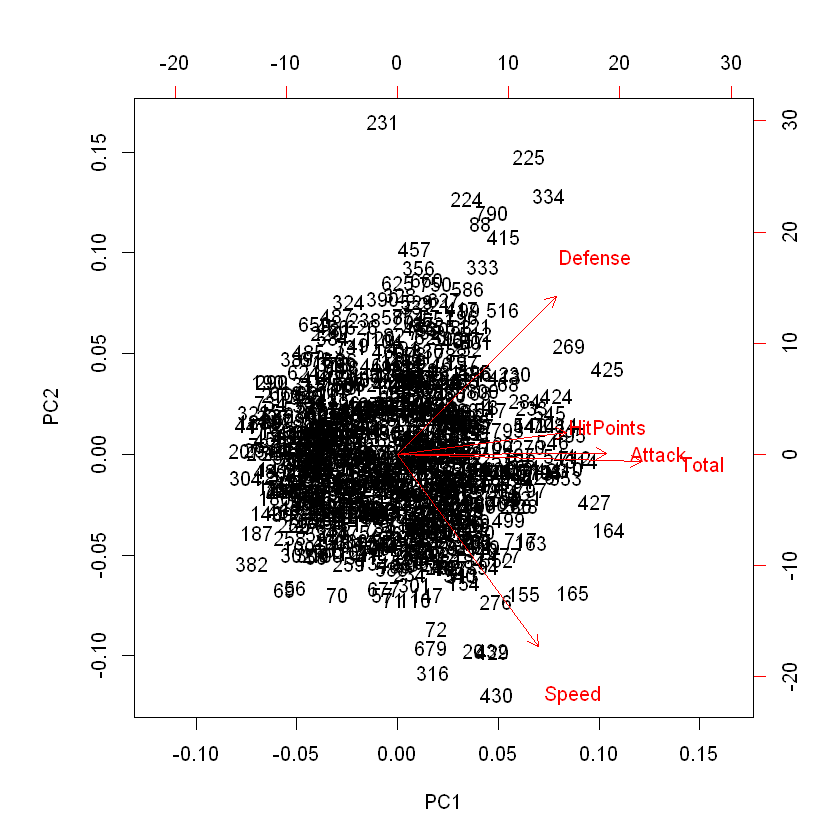

In [69]:
# PCA model with scaling: pr.with.scaling
pr.with.scaling <- prcomp(pokemon, center=T, scale=T)

# PCA model without scaling: pr.without.scaling
pr.without.scaling <- prcomp(pokemon, center=T, scale=F)

# Create biplots of both for comparison
biplot(pr.with.scaling)

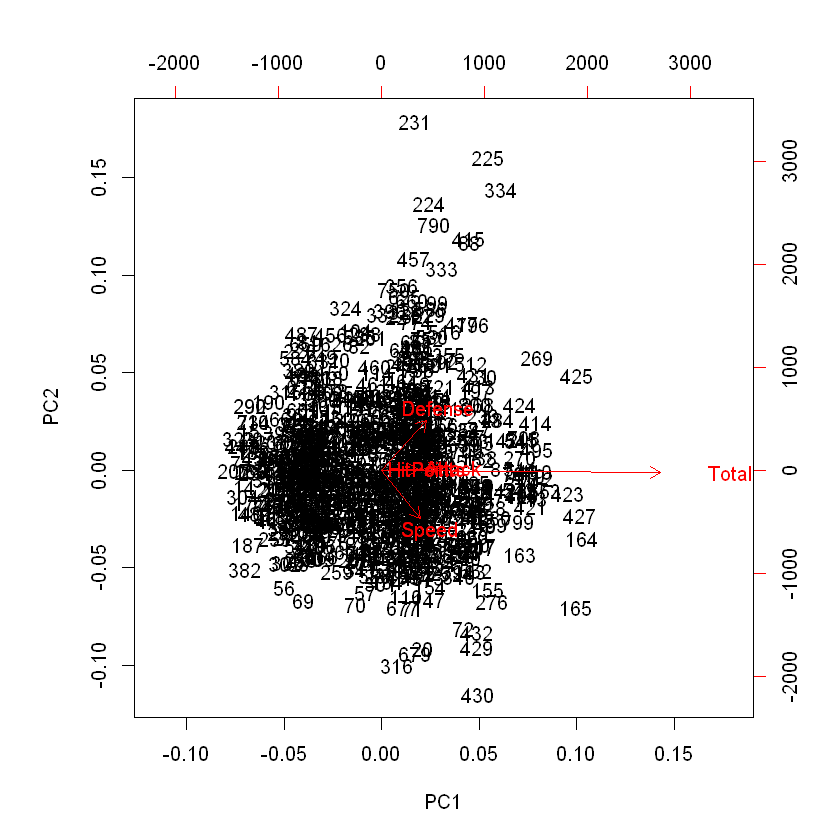

In [70]:
biplot(pr.without.scaling)

The new Total column contains much more variation, on average, than the other four columns, so it has a disproportionate effect on the PCA model when scaling is not performed. After scaling the data, there's a much more even distribution of the loading vectors.

# Exploring Wisconsin breast cancer data

## Introduction to the case study

- Human breast mass data:
  - Ten features measured of each cell nuclei
  - Summary information is provided for each group of cells
  - Includes diagnosis: benign (not cancerous) and malignant (cancerous)

### Analysis
- Download data and prepare data for modeling
- Exploratory data analysis (# observations, # features, etc.)
- Perform PCA and interpret results
- Complete two types of clusteringUnderstand and compare the two types
- Combine PCA and clustering


### Preparing the data

In [71]:
url <- "datasets//WisconsinCancer.csv"

# Download the data: wisc.df
wisc.df <- read.csv(url)

# Convert the features of the data: wisc.data
wisc.data <- as.matrix(wisc.df[3:32])

# Set the row names of wisc.data
row.names(wisc.data) <- wisc.df$id

# Create diagnosis vector
diagnosis <- as.numeric(wisc.df$diagnosis == "M")

### Exploratory data analysis

- How many observations are in this dataset?

In [72]:
dim(wisc.data)

[1] 569  30

In [73]:
names(wisc.df)

[1] "id"                      "diagnosis"              
 [3] "radius_mean"             "texture_mean"           
 [5] "perimeter_mean"          "area_mean"              
 [7] "smoothness_mean"         "compactness_mean"       
 [9] "concavity_mean"          "concave.points_mean"    
[11] "symmetry_mean"           "fractal_dimension_mean" 
[13] "radius_se"               "texture_se"             
[15] "perimeter_se"            "area_se"                
[17] "smoothness_se"           "compactness_se"         
[19] "concavity_se"            "concave.points_se"      
[21] "symmetry_se"             "fractal_dimension_se"   
[23] "radius_worst"            "texture_worst"          
[25] "perimeter_worst"         "area_worst"             
[27] "smoothness_worst"        "compactness_worst"      
[29] "concavity_worst"         "concave.points_worst"   
[31] "symmetry_worst"          "fractal_dimension_worst"
[33] "X"

### Performing PCA
The next step  is to perform PCA on wisc.data.

it's important to check if the data need to be scaled before performing PCA. Two common reasons for scaling data:

- The input variables use different units of measurement.
- The input variables have significantly different variances.

In [74]:
# Check column means and standard deviations
colMeans(wisc.data)

radius_mean            texture_mean          perimeter_mean 
           1.412729e+01            1.928965e+01            9.196903e+01 
              area_mean         smoothness_mean        compactness_mean 
           6.548891e+02            9.636028e-02            1.043410e-01 
         concavity_mean     concave.points_mean           symmetry_mean 
           8.879932e-02            4.891915e-02            1.811619e-01 
 fractal_dimension_mean               radius_se              texture_se 
           6.279761e-02            4.051721e-01            1.216853e+00 
           perimeter_se                 area_se           smoothness_se 
           2.866059e+00            4.033708e+01            7.040979e-03 
         compactness_se            concavity_se       concave.points_se 
           2.547814e-02            3.189372e-02            1.179614e-02 
            symmetry_se    fractal_dimension_se            radius_worst 
           2.054230e-02            3.794904e-03            1.626919e+01 
          texture_worst         perimeter_worst              area_worst 
           2.567722e+01            1.072612e+02            8.805831e+02 
       smoothness_worst       compactness_worst         concavity_worst 
           1.323686e-01            2.542650e-01            2.721885e-01 
   concave.points_worst          symmetry_worst fractal_dimension_worst 
           1.146062e-01            2.900756e-01            8.394582e-02

In [75]:
apply(wisc.data, 2, sd)

radius_mean            texture_mean          perimeter_mean 
           3.524049e+00            4.301036e+00            2.429898e+01 
              area_mean         smoothness_mean        compactness_mean 
           3.519141e+02            1.406413e-02            5.281276e-02 
         concavity_mean     concave.points_mean           symmetry_mean 
           7.971981e-02            3.880284e-02            2.741428e-02 
 fractal_dimension_mean               radius_se              texture_se 
           7.060363e-03            2.773127e-01            5.516484e-01 
           perimeter_se                 area_se           smoothness_se 
           2.021855e+00            4.549101e+01            3.002518e-03 
         compactness_se            concavity_se       concave.points_se 
           1.790818e-02            3.018606e-02            6.170285e-03 
            symmetry_se    fractal_dimension_se            radius_worst 
           8.266372e-03            2.646071e-03            4.833242e+00 
          texture_worst         perimeter_worst              area_worst 
           6.146258e+00            3.360254e+01            5.693570e+02 
       smoothness_worst       compactness_worst         concavity_worst 
           2.283243e-02            1.573365e-01            2.086243e-01 
   concave.points_worst          symmetry_worst fractal_dimension_worst 
           6.573234e-02            6.186747e-02            1.806127e-02

In [76]:
# Execute PCA, scaling if appropriate: wisc.pr
wisc.pr <- prcomp(wisc.data, center=T, scale=T)

# Look at summary of results
summary(wisc.pr)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.6444 2.3857 1.67867 1.40735 1.28403 1.09880 0.82172
Proportion of Variance 0.4427 0.1897 0.09393 0.06602 0.05496 0.04025 0.02251
Cumulative Proportion  0.4427 0.6324 0.72636 0.79239 0.84734 0.88759 0.91010
                           PC8    PC9    PC10   PC11    PC12    PC13    PC14
Standard deviation     0.69037 0.6457 0.59219 0.5421 0.51104 0.49128 0.39624
Proportion of Variance 0.01589 0.0139 0.01169 0.0098 0.00871 0.00805 0.00523
Cumulative Proportion  0.92598 0.9399 0.95157 0.9614 0.97007 0.97812 0.98335
                          PC15    PC16    PC17    PC18    PC19    PC20   PC21
Standard deviation     0.30681 0.28260 0.24372 0.22939 0.22244 0.17652 0.1731
Proportion of Variance 0.00314 0.00266 0.00198 0.00175 0.00165 0.00104 0.0010
Cumulative Proportion  0.98649 0.98915 0.99113 0.99288 0.99453 0.99557 0.9966
                          PC22    PC23   PC24 

### Interpreting PCA results
Now we'll use some visualizations to better understand the PCA model. 


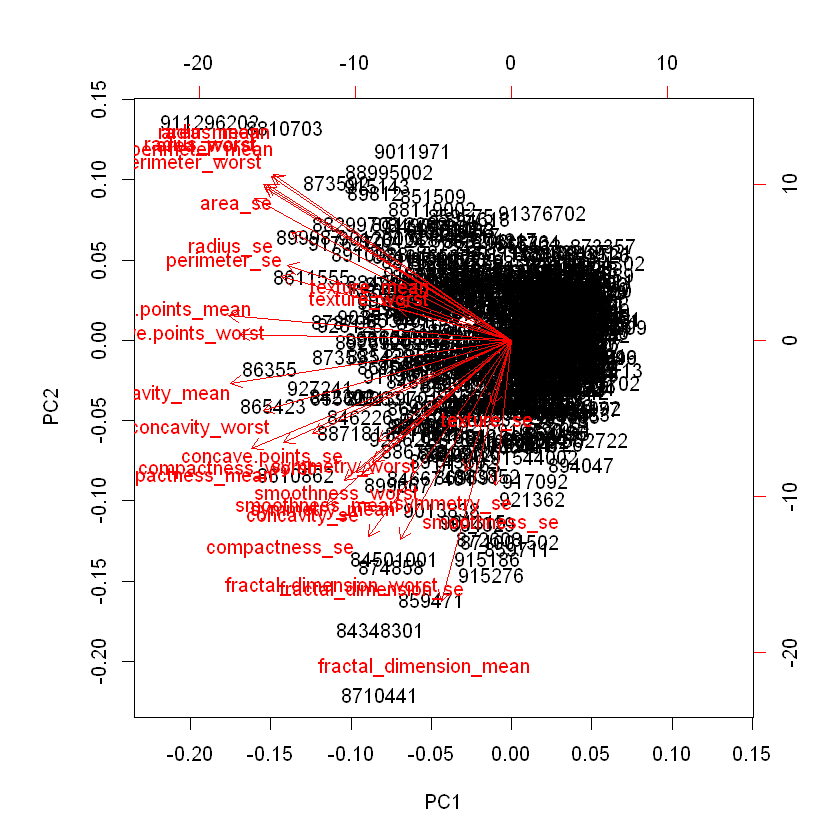

In [77]:
# Create a biplot of wisc.pr
biplot(wisc.pr)

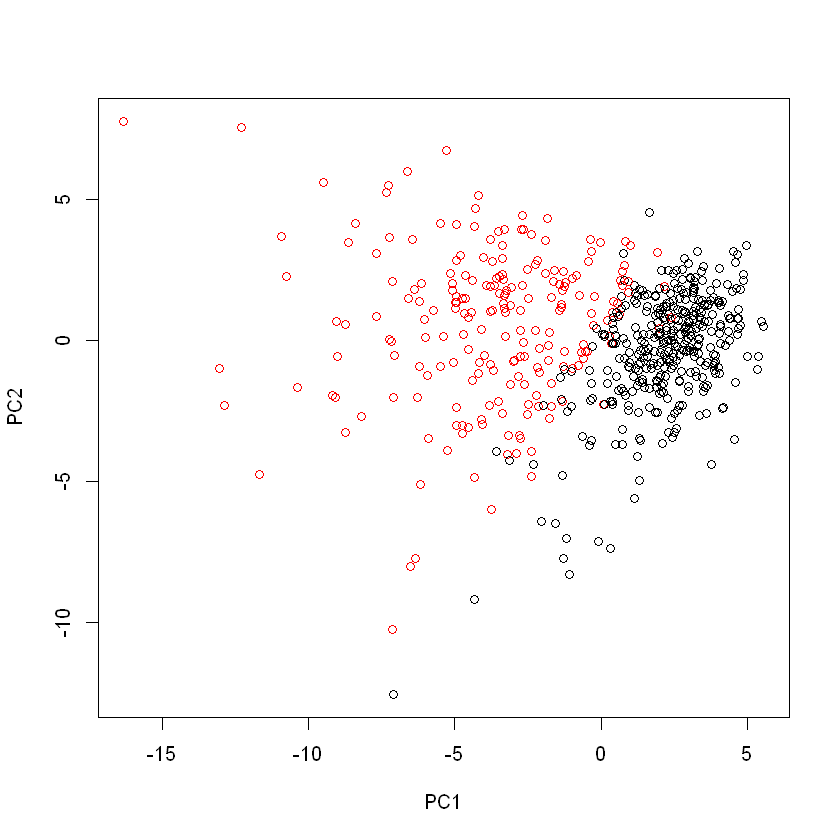

In [78]:
# Scatter plot observations by components 1 and 2
plot(wisc.pr$x[, c(1, 2)], col = (diagnosis + 1), 
     xlab = "PC1", ylab = "PC2")

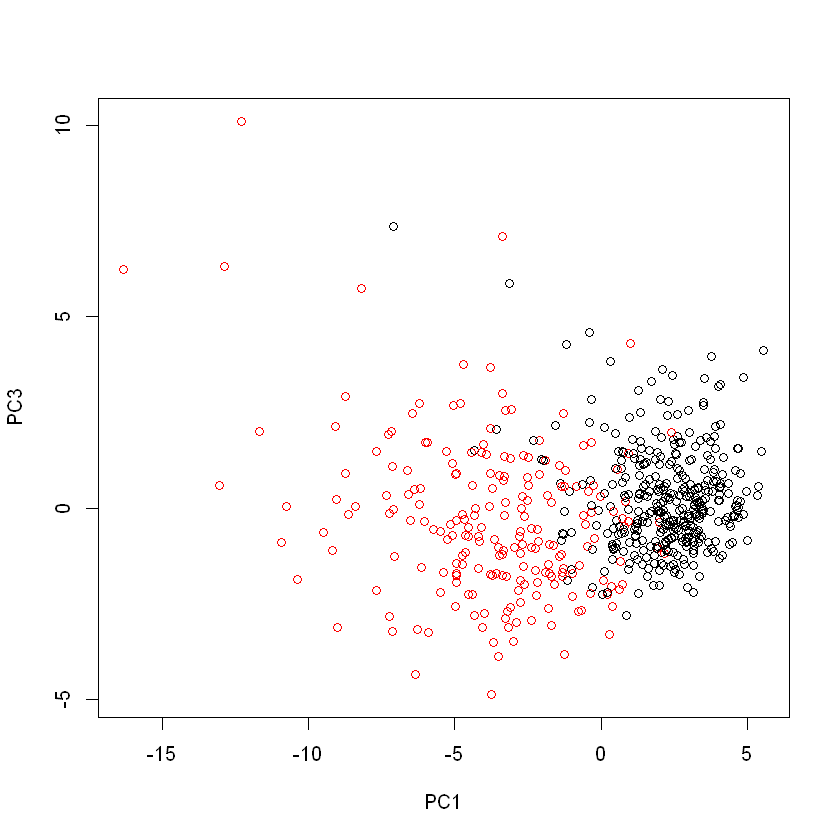

In [79]:
# Repeat for components 1 and 3
plot(wisc.pr$x[, c(1,3)], col = (diagnosis + 1), 
     xlab = "PC1", ylab = "PC3")



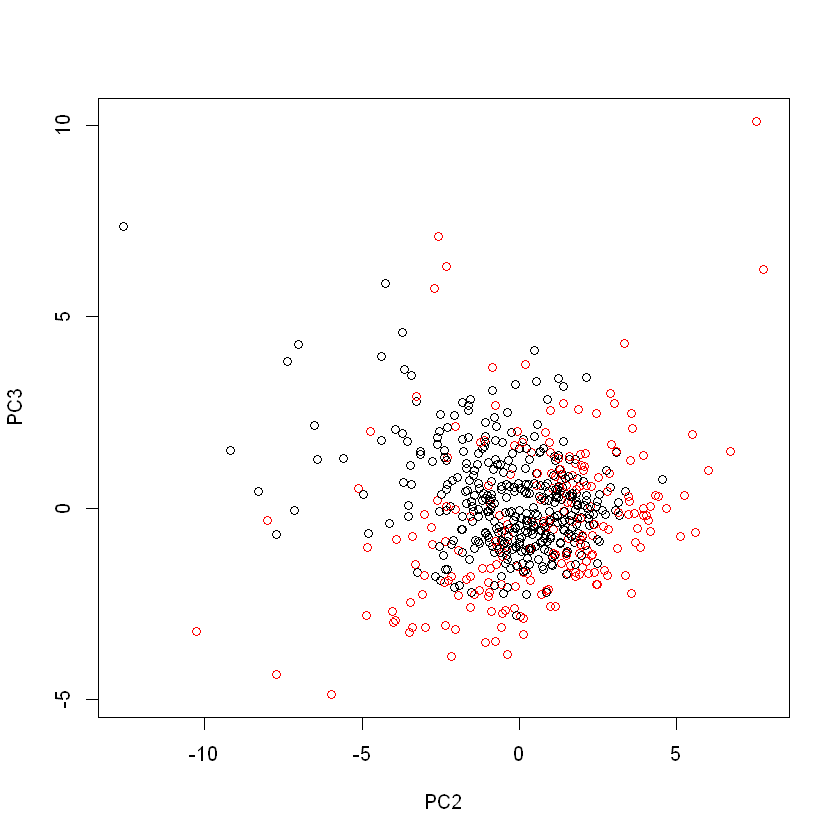

In [80]:
# Do additional data exploration of your choosing below (optional)
plot(wisc.pr$x[, c(2,3)], col = (diagnosis + 1), 
     xlab = "PC2", ylab = "PC3")


Because principal component 2 explains more variance in the original data than principal component 3, you can see that the first plot has a cleaner cut separating the two subgroups.

### Variance explained

We will produce scree plots showing the proportion of variance explained as the number of principal components increases. The data from PCA must be prepared for these plots, as there is not a built-in function in R to create them directly from the PCA model.


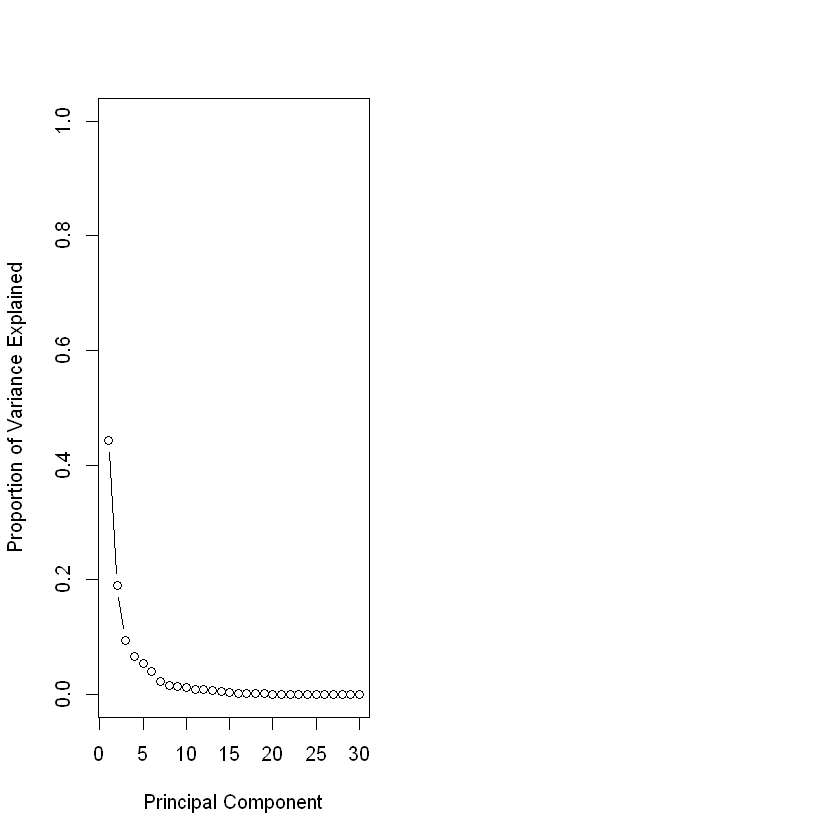

In [81]:
# Set up 1 x 2 plotting grid
par(mfrow = c(1, 2))

# Calculate variability of each component
pr.var <- wisc.pr$sdev^2

# Variance explained by each principal component: pve
pve <- pr.var/sum(pr.var)

# Plot variance explained for each principal component
plot(pve, xlab = "Principal Component", 
     ylab = "Proportion of Variance Explained", 
     ylim = c(0, 1), type = "b")

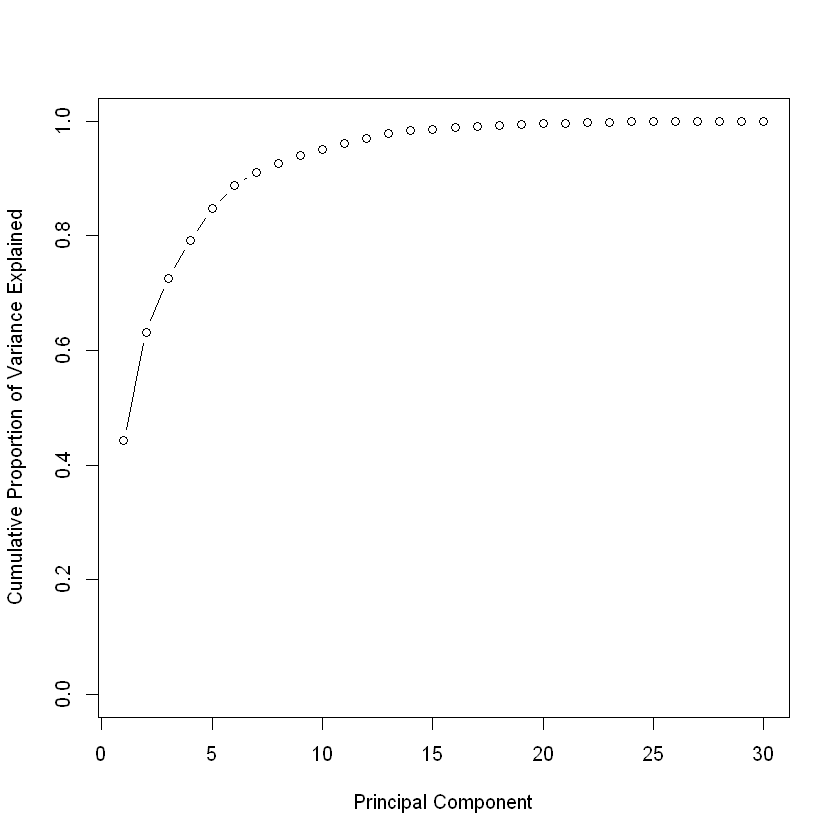

In [82]:
# Plot cumulative proportion of variance explained
plot(cumsum(pve), xlab = "Principal Component", 
     ylab = "Cumulative Proportion of Variance Explained", 
     ylim = c(0, 1), type = "b")

### Next steps
- Complete hierarchical clustering
- Complete k-means clustering
- Combine PCA and clustering
- Contrast results of hierarchical clustering with diagnosis
- Compare hierarchical and k-means clustering results
- PCA as a pre-processing step for clustering


### Hierarchical clustering of case data

We will do hierarchical clustering of the observations. This type of clustering does not assume in advance the number of natural groups that exist in the data.

As part of the preparation for hierarchical clustering, distance between all pairs of observations are computed. Furthermore, there are different ways to link clusters together, with single, complete, and average being the most common linkage methods.

In [83]:
# Scale the wisc.data data: data.scaled
data.scaled <- scale(wisc.data)

# Calculate the (Euclidean) distances: data.dist
data.dist <- dist(data.scaled)

# Create a hierarchical clustering model: wisc.hclust
wisc.hclust <- hclust(data.dist, method="complete")

### Results of hierarchical clustering

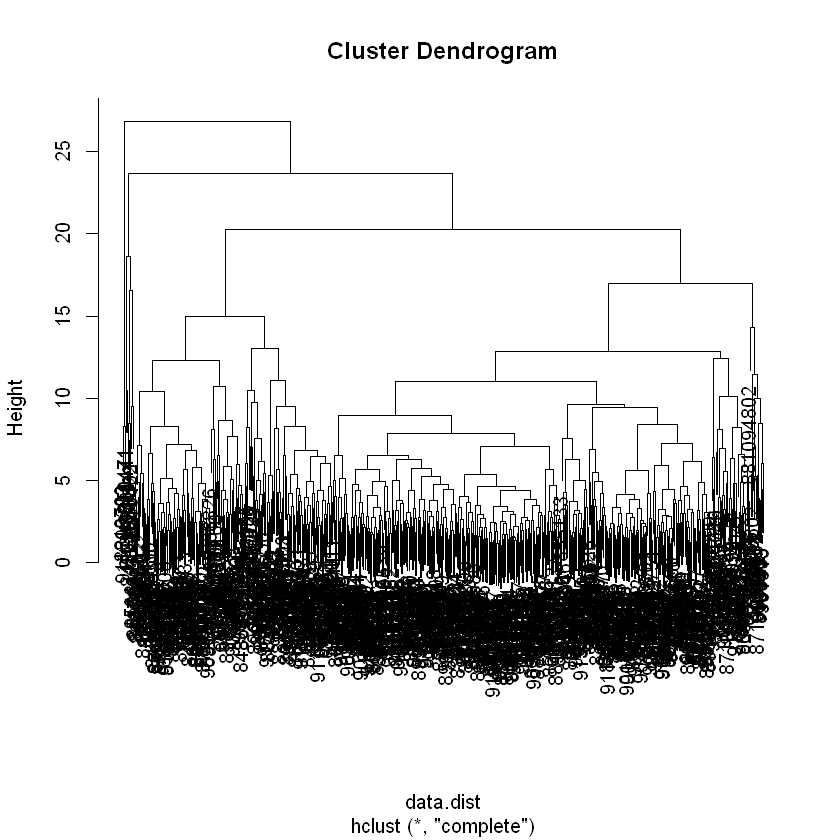

In [84]:
plot(wisc.hclust)

### Selecting number of clusters

We will compare the outputs from your hierarchical clustering model to the actual diagnoses. Normally when performing unsupervised learning like this, a target variable isn't available. We do have it with this dataset, however, so it can be used to check the performance of the clustering model.

When performing supervised learning—that is, when we're trying to predict some target variable of interest and that target variable is available in the original data—using clustering to create new features may or may not improve the performance of the final model.

In [85]:
# Cut tree so that it has 4 clusters: wisc.hclust.clusters
wisc.hclust.clusters <- cutree(wisc.hclust, k=4)

# Compare cluster membership to actual diagnoses
table(wisc.hclust.clusters, diagnosis)

                    diagnosis
wisc.hclust.clusters   0   1
                   1  12 165
                   2   2   5
                   3 343  40
                   4   0   2

Four clusters were picked after some exploration. Before moving on, we may want to explore how different numbers of clusters affect the ability of the hierarchical clustering to separate the different diagnoses

### k-means clustering and comparing results

There are two main types of clustering: hierarchical and k-means.

We will create a k-means clustering model on the Wisconsin breast cancer data and compare the results to the actual diagnoses and the results of your hierarchical clustering model.

In [86]:
# Create a k-means model on wisc.data: wisc.km
wisc.km <- kmeans(scale(wisc.data), centers=2, nstart=20)

# Compare k-means to actual diagnoses
table(wisc.km$cluster, diagnosis)

   diagnosis
      0   1
  1  14 175
  2 343  37

In [87]:
# Compare k-means to hierarchical clustering
table(wisc.km$cluster, wisc.hclust.clusters)

   wisc.hclust.clusters
      1   2   3   4
  1 160   7  20   2
  2  17   0 363   0

Looking at the second table you generated, it looks like clusters 1, 2, and 4 from the hierarchical clustering model can be interpreted as the cluster 1 equivalent from the k-means algorithm, and cluster 3 can be interpreted as the cluster 2 equivalent.

### Clustering on PCA results

We will put together several steps used earlier and, in doing so, we will experience some of the creativity that is typical in unsupervised learning.

The PCA model required significantly fewer features to describe 80% and 95% of the variability of the data. In addition to normalizing data and potentially avoiding overfitting, PCA also uncorrelates the variables, sometimes improving the performance of other modeling techniques.

Let's see if PCA improves or degrades the performance of hierarchical clustering.

In [88]:
# Create a hierarchical clustering model: wisc.pr.hclust
wisc.pr.hclust <- hclust(dist(wisc.pr$x[, 1:7]), method = "complete")

# Cut model into 4 clusters: wisc.pr.hclust.clusters
wisc.pr.hclust.clusters <- cutree(wisc.pr.hclust, k=4)

# Compare to actual diagnoses
table(wisc.pr.hclust.clusters, diagnosis)

                       diagnosis
wisc.pr.hclust.clusters   0   1
                      1   5 113
                      2 350  97
                      3   2   0
                      4   0   2

In [89]:
table(wisc.hclust.clusters, diagnosis)

                    diagnosis
wisc.hclust.clusters   0   1
                   1  12 165
                   2   2   5
                   3 343  40
                   4   0   2

In [90]:
# Compare to k-means and hierarchical
table(wisc.km$cluster, diagnosis)

   diagnosis
      0   1
  1  14 175
  2 343  37